In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from scipy.stats import linregress
import datetime

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [6]:
engine = create_engine(f"sqlite:///hawaii.sqlite")
conn = engine.connect()
engine2 = create_engine(f"sqlite:///hawaii_stations.sqlite")
conn2 = engine.connect()
#data = engine.execute("SELECT*FROM stations")
#data = pd.read_sql("SELECT * FROM hawaii_stations", conn)
inspector = inspect(engine)
inspector.get_table_names()
#inspector2 = inspect(engine2)
#inspector2.get_table_names()

['measurement', 'station']

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)
Measurement = Base.classes.measurement

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
inspector = inspect(engine)
inspector.get_table_names()


['measurement', 'station']

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

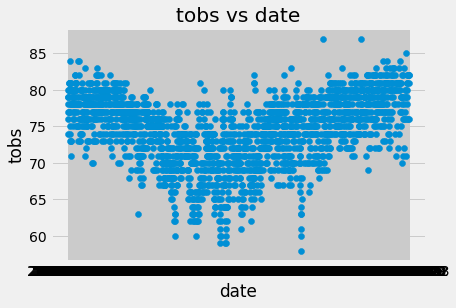

In [11]:
### Design a query to retrieve the last 12 months of precipitation data and plot the results
#date = engine.execute("SELECT* DATEADD(year,1, 2017-08-23)")

#int(first_date)

#print("Query Date: ", query_date)

#session.query(Measurement.date, Measurement.tobs, Measurement.prcp, Measurement.id).\
 #   filter(Measurement.date == first_date).all()
# Calculate the date 1 year ago from the last data point in the database
date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
#first_date = dt.datetime(first_date)
#query_date = dt.date(first_date) - dt.timedelta(days = 365)
# Perform a query to retrieve the data and precipitation score
yeardata = session.query(Measurement.station, Measurement.date, Measurement.prcp, Measurement.id, Measurement.tobs).\
    filter(Measurement.date > '2016-08-23').\
    order_by(Measurement.date).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(yeardata, columns=['station','date', 'prcp', 'id', 'tobs'])
databydate = df.set_index('date')
# Sort the dataframe by date
#sorted_df = databydate.sort_values(by = 'index', ascending = True)
# Use Pandas Plotting with Matplotlib to plot the data
x_values = databydate.index
y_values = databydate["tobs"]
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('date')
plt.ylabel('tobs')
plt.title('tobs vs date')
#print(f"The r-squared is: {rvalue**2}")
plt.show()



In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp,id,tobs
count,2015.000000,2223.000000,2223.000000
mean,0.176462,10159.397211,74.578947
std,0.460288,5604.268703,4.612232
min,0.000000,2365.000000,58.000000
25%,0.000000,5287.500000,71.000000
50%,0.020000,8931.000000,75.000000
75%,0.130000,14751.500000,78.000000
max,6.700000,19550.000000,87.000000


In [14]:
# Design a query to show how many stations are available in this dataset?
data = pd.read_sql("SELECT * FROM station", conn)
data.count()


id           9
station      9
name         9
latitude     9
longitude    9
elevation    9
dtype: int64

In [17]:
# What are the most active stations? (i.e. what stations have the most rows)?
count = df["station"].count()
stations_df = df.groupby('station')
counted_df = stations_df['id'].count()
#List the stations and the counts in descending order.
counted_df.sort_values(ascending = False)
#counted_df.loc[counted_df.max()]
#data1 = engine.execute("SELECT station FROM measurement GROUP BY station ORDER BY COUNT(*) DESC")
#for record in data1:
   # print(record)

station
USC00519397    360
USC00519281    351
USC00516128    348
USC00513117    342
USC00519523    336
USC00514830    304
USC00517948    182
Name: id, dtype: int64

In [19]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
freq_df = pd.read_sql("SELECT* FROM measurement GROUP BY station ORDER BY COUNT(*) DESC LIMIT 1",conn)
freq_df_stat = pd.merge(freq_df, df, on="station")
freq_df_stat
max_df = freq_df_stat['tobs_y'].max()
min_df = freq_df_stat['tobs_y'].min()
avg_df = freq_df_stat['tobs_y'].mean()
print("max:", max_df, "min:", min_df, "avg:", avg_df)


max: 83.0 min: 59.0 avg: 73.0968660968661


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018EF1D16E08>]],
      dtype=object)

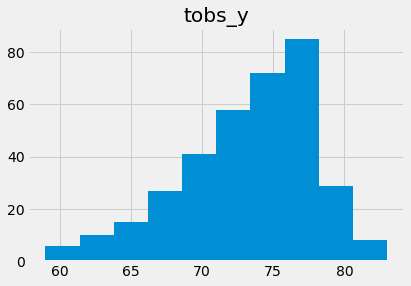

In [20]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
freq_df_stat.hist(column = 'tobs_y')

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
